In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
folder = 'build/la_16_16_32/'
N1 = 16
N2 = 16
N3 = 32

In [66]:
delta_x = np.fromfile('%sla_delta_x3.dat' % folder, dtype='f8')
delta_x = delta_x.reshape([N1, N2, N3])

[]

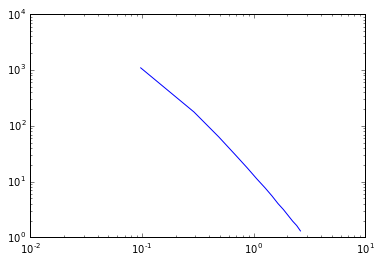

In [67]:
k_bins = np.loadtxt('%sla3_k_bins.txt' % folder)
ps = np.loadtxt('%sla3_actual_ps.txt' % folder)
plot(k_bins, ps)
loglog()

In [73]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar

def plot_image(matrix, cmap = cm.ocean, sizebar = True, text = '', colorbar = False, useAx = None, text_start_pos = 0.4, vmin = None, vmax = None):
    #N = int(np.sqrt(len(matrix)))
    #matrix = matrix.reshape([N, N])

    fig = figure(figsize=(4,8), dpi=128)
    if useAx == None:
        ax = fig.add_axes([0,0,1,1])
    else:
        ax = useAx
        ax.cla()
    
    ax.set_axis_off()
    im = ax.imshow(matrix, cmap=cmap, extent=(0,64,0,32), vmin = vmin, vmax = vmax)

    if colorbar:
        fig.colorbar(im)
        
    asb =  AnchoredSizeBar(ax.transData,
                             10,
                             '10 Mpc/$h$',
                             loc=4,
                             pad=0.1, borderpad=0.5, sep=10,
                             frameon=False, color = 'white', size_vertical = 1)

    fontsize = 20
    color = 'white'
    if color is not None:
        for r in asb.size_bar.findobj(Rectangle):
            r.set_edgecolor(color)
        for t in asb.txt_label.findobj(Text):
            t.set_color(color)
    if fontsize is not None:
        for t in asb.txt_label.findobj(Text):
            t.set_fontsize(fontsize)

    if sizebar:
        ax.add_artist(asb)
        
    if text != '':
        ax.text(text_start_pos, 0.9, text, color = 'white', fontsize = 17, transform = ax.transAxes)
  
    return ax, im

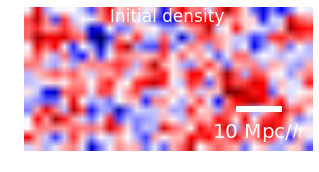

In [74]:
plot_image(delta_x[0,:,:], cmap = cm.seismic, text = 'Initial density', text_start_pos=0.3)
savefig('%sinitial_density.eps' % folder)

In [75]:
delta_x_nl = np.fromfile('%sla_delta_x3_nl.dat' % folder, dtype='f8').reshape([N1, N2, N3])

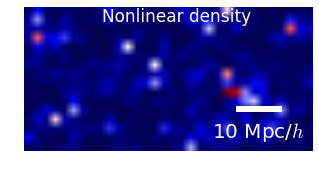

In [76]:
plot_image(delta_x_nl[0,:,:], cmap = cm.seismic, text = 'Nonlinear density', text_start_pos = 0.27)
savefig('%snonlinear_density.eps' % folder)

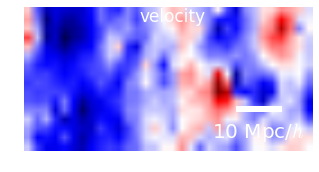

In [78]:
v = np.fromfile('%sla_v3.dat' % folder, dtype='f8').reshape([N1, N2, N3])
plot_image(v[0,:,:], cmap = cm.seismic, text = 'velocity', text_start_pos=0.4)
savefig('%svelocity.eps' % folder)

1.94311809712


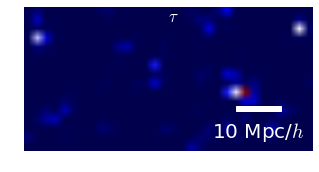

In [79]:
tau = np.fromfile('%sla_tau3.dat' % folder, dtype='f8').reshape([N1, N2, N3])
plot_image(tau[0,:,:], cmap = cm.seismic, text = r'$\tau$', text_start_pos = 0.5)
savefig('%stau.eps' % folder)
print tau.mean()

0.679693514647


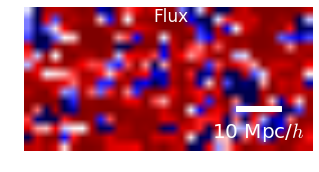

In [80]:
flux = np.fromfile('%sla_flux3.dat' % folder, dtype='f8').reshape([N1, N2, N3])
plot_image(flux[0,:,:], cmap = cm.seismic, text = 'Flux', text_start_pos = 0.45)
savefig('%sflux.eps' % folder)
print flux.mean()

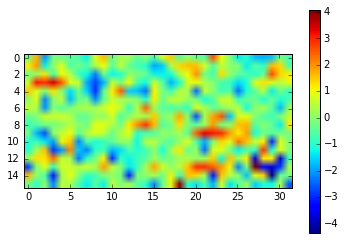

In [81]:
delta_x_min = np.fromfile('%sla_min3.dat' % folder, dtype='f8').reshape([N1, N2, N3])
imshow(delta_x_min[0,:,:])
colorbar()

(<matplotlib.axes._axes.Axes at 0x11f93b890>,
 <matplotlib.image.AxesImage at 0x10d5a5590>)

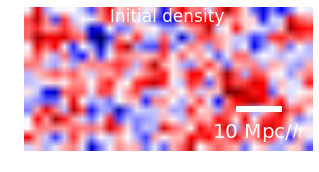

In [82]:
plot_image(delta_x[0,:,:], cmap = cm.seismic, text = 'Initial density', text_start_pos=0.3)

build/la_16_16_32/lbfgs_iter_21000.dat
(8192,)


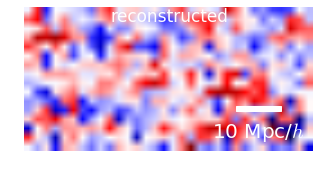

In [84]:
c = 21000
print '%slbfgs_iter_%d.dat' % (folder, c)
iter1 = np.fromfile('%slbfgs_iter_%d.dat' % (folder, c), dtype='f8')
print iter1.shape
iter1 = iter1.reshape([N1, N2, N3])
plot_image(iter1[0,:,:], cmap = cm.seismic, text = 'reconstructed', text_start_pos=0.3)
savefig('%sreconstructed.eps' % folder)

21272
21271  iterations


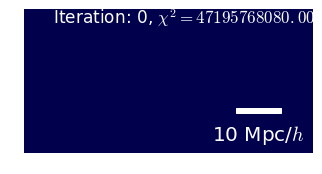

In [86]:
from matplotlib import animation
import os.path

def createAnimation():
    fig = figure(figsize=(4,4), dpi=128)
    ax = fig.add_axes([0,0,1,1])
    
    it = 0
    while True:
        filename = '%slbfgs_iter_%d.dat' % (folder, it)
        if os.path.exists(filename):
            it += 1
        else:
            break
            
    chi2 = np.loadtxt('%schi2.txt' % folder)
    print len(chi2)
    
    it = len(chi2) - 1
            
    print it, ' iterations'
    
    iterations = []
    
    for i in range(it):
        if i < 100:
            iterations.append(i)
        elif i < 200 and i % 2 == 0:
            iterations.append(i)
        elif i < 1000 and i % 10 == 0:
            iterations.append(i)
        elif i < 10000 and i % 100 == 0:
            iterations.append(i)
        elif i % 1000 == 0:
            iterations.append(i)
    
    def animate(i1):
        i = iterations[i1]
        filename = '%slbfgs_iter_%d.dat' % (folder, i)
        text = 'Iteration: %d, $\chi^2 = %.2f$' % (i, chi2[i,1])
        mat = np.fromfile(filename, dtype='f8').reshape(N1, N2, N3)
        ax1, im  = plot_image(mat[0,:,:], cmap = cm.seismic, useAx = ax, text = text, text_start_pos = 0.1)
        return im
    
    def init():
        return animate(0)
    
    it = min(it, 1000)
    
    anim = animation.FuncAnimation(fig, animate, init_func = init, frames = len(iterations), interval = 10)
    return anim

anim = createAnimation()
anim.save('%slbfgs_iterations.mp4' % folder, fps = 10)

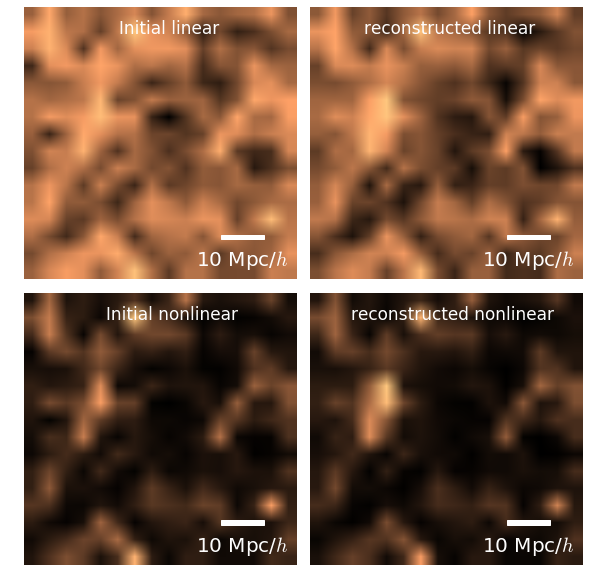

In [53]:
cmap = cm.copper
fig, ax = plt.subplots(2, 2, sharex=True, sharey = True, figsize = (10, 10))
plot_image(delta_x[0,:,:], cmap = cmap, text = 'Initial linear', text_start_pos=0.35, useAx=ax[0, 0])
plot_image(delta_x_nl[0,:,:], cmap = cmap, text = 'Initial nonlinear', text_start_pos=0.3, useAx=ax[1, 0])
plot_image(iter1[0,:,:], cmap = cmap, text = 'reconstructed linear', text_start_pos=0.2, useAx=ax[0, 1])
plot_image(np.exp(iter1[0,:,:]) - 1, cmap = cmap, text = 'reconstructed nonlinear', text_start_pos=0.15, useAx=ax[1, 1])
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.savefig('density.pdf')

In [97]:
def smooth_mat(matrix, s):
    res = np.zeros(matrix.shape)
    n = matrix.shape[0]
    m = matrix.shape[1]
    for i in range(n):
        for j in range(m):
            r = 0.0
            norm = 0.0
            for k in range(n):
                for l in range(m):
                    d1 = (k + n - i) % n
                    d1 = min(d1, n - d1)
                    d2 = (l + m - j) % m
                    d2 = min(d2, m - d2)
                    f = np.exp(-(d1**2+d2**2)/s**2)
                    r += matrix[k, l] * f
                    norm += f
            res[i, j] = r / norm
    return res

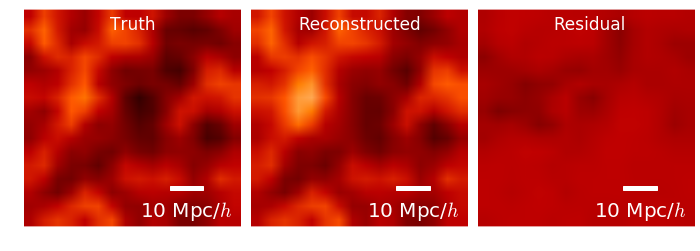

In [110]:
cmap = cm.gist_heat
sm = 1.0
fig, ax = plt.subplots(1, 3, sharex=True, sharey = True, figsize = (12, 4))
plot_image(smooth_mat(delta_x[0,:,:], sm), cmap = cmap, text = 'Truth', text_start_pos=0.4, useAx=ax[0], vmin = -2, vmax = 2)
plot_image(smooth_mat(iter1[0,:,:], sm), cmap = cmap, text = 'Reconstructed', text_start_pos=0.22, useAx=ax[1], vmin = -2, vmax = 2)
plot_image(smooth_mat(delta_x[0,:,:] - iter1[0,:,:], sm), cmap = cmap, text = 'Residual', text_start_pos=0.35, useAx=ax[2], vmin = -2, vmax = 2)
fig.subplots_adjust(wspace=0.05, hspace=0.05)
fig.savefig('density.pdf')

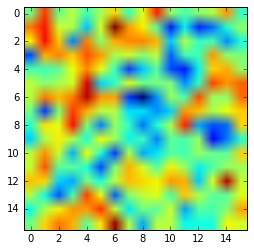

In [94]:
imshow(smooth_mat(delta_x[0,:,:], 0.001))

In [41]:
chi2 = np.loadtxt('%schi2.txt'%folder)

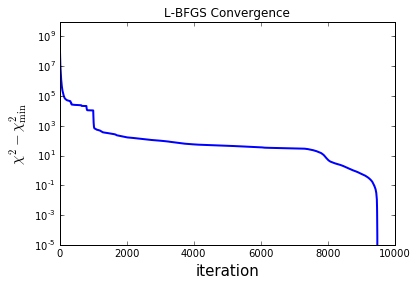

In [52]:
chi2 = np.loadtxt('%schi2.txt' % folder)
plt.plot(chi2[:,0], chi2[:,1] - chi2[-1,1], lw = 2)
plt.yscale('log')
plt.xlabel('iteration', fontsize=15)
plt.ylabel('$\chi^2-\chi_\min^2$', fontsize=15)
plt.title('L-BFGS Convergence')
plt.savefig('chi2.pdf')

(array([  1.,  10.,  22.,  29.,  46.,  57.,  37.,  35.,  14.,   5.]),
 array([-2.48573042, -2.06338725, -1.64104408, -1.21870091, -0.79635775,
        -0.37401458,  0.04832859,  0.47067176,  0.89301492,  1.31535809,
         1.73770126]),
 <a list of 10 Patch objects>)

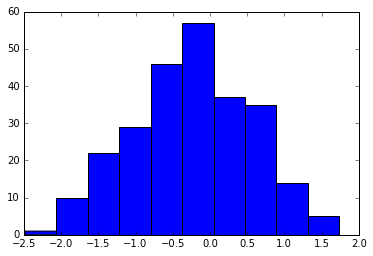

In [67]:
plt.hist(delta_x[0,:,:].reshape(16*16))